Build a regression model.

#### Let's take a look at the relationship between features with a heatmap

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data 
df_joined = pd.read_csv('joined.csv', index_col=None)

# Creating heatmap data
df_heatmap = df_joined[['usage','total_bikes','poi_distance']].copy()

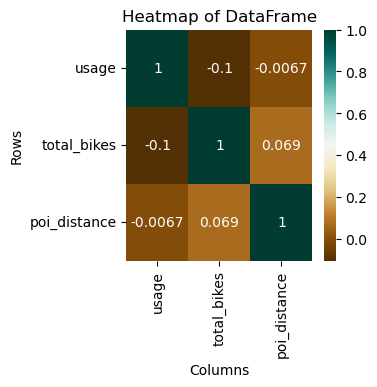

In [3]:
# Create a heatmap using seaborn
plt.figure(figsize=(3, 3))  # Set the figure size

# Create the heatmap
c= df_heatmap.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# Add labels and title
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Heatmap of DataFrame")

# Show the plot
plt.show()

#### The heatmap shows some interesting results, indicating that usage seems to be negatively corellated with the total number of bikes at a station - meaning as the total number of bikes at a station go up, usage percentage seems to go down.  This might mean that Broward B-Cycle is over-supplying the marketplace with bikes. Conversely as the distance from points of interest increase, the total number of bikes increase - meaning people need bikes to ride to far-off points of interest.

In [4]:
#Import Libraries

import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
X = df_joined[['usage', 'poi_distance']] 
y = df_joined['total_bikes']

In [5]:
## fit a OLS model with intercept on TV and Radio 
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit()

Provide model output and an interpretation of the results. 

In [6]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_bikes   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.440
Date:                Tue, 12 Sep 2023   Prob (F-statistic):             0.0122
Time:                        11:06:13   Log-Likelihood:                -1250.4
No. Observations:                 570   AIC:                             2507.
Df Residuals:                     567   BIC:                             2520.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.3697      0.279     44.382      0.000      11.822      12.917
usage           -1.2977      0.525     -2.473      0.014      -2.328      -0.267
poi_distance     0.0005      0.000      1.646      0.100   -9.48e-05       0.001
==============================================================================
Omnibus:                       63.935   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.315
Skew:                           0.941   Prob(JB):                     4.91e-19
Kurtosis:                       3.083   Cond. No.                     3.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We have an R-squared value is of 0.015% which is not great. It means that the degree of variance in Y variable is not very well explained by X variables - which means that in all likelihood the X variables we're using are not particularly good. 

#### After looking at the p values we can see that ‘poi_distance’ is not a significant X variable since p value is greater than 0.05. The  'usage' X variable does seem to be significant.

#### In conclusion, we can say that the 'poi_distance' does not explain the degree of variance in the Y variable in a statistically significant way.  The 'usage' variable, although significant is not a major contributor to the degree of variance in Y. 

# Stretch

How can you turn the regression model into a classification model?

#### To turn a regression model into a classification model, you need to transform the continuous output produced by the regression model into discrete class labels.  For instance, predictions greater than or equal to, say, 0.5 are classified as 1, and predictions less than 0.5 are classified as 0.